In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def positive(x): 
    ''' returns the []_+ of an array or a list '''
    for idx, elem in enumerate(x):
        if elem <= 0: x[idx] = 0
    return x

def firingRate(dt,T=100):
    '''Return an array of firing rate over time with timestep dt and for T seconds'''
    T = T
    n = int(T/dt) # total time steps

    # Quantities for O-U precess
    alpha = 1 # value from fig2 
    sigma = 1 # value from fig2
    rho = np.zeros(n)
    # O-U
    np.random.seed(1010) # for reproducible firing rates
    for i in range(n - 1):
        rho[i + 1] = rho[i] - dt*alpha*rho[i] + np.sqrt(dt)*sigma*np.random.randn() 

    return positive(rho) # set negative part to 0

def spikeTrain(dt,N_neurons=1000): 
    '''Return an array with the sum of N_neurons spiking over time
    see firingRate() for more details'''
    N_neurons = N_neurons # number used in Touboul paper
    rho = firingRate(dt)
    max_rho = np.max(rho)
    S_shape = np.zeros(len(rho)) # temporal profile of hte sum of all neurons' spikes

    for neuron in range(N_neurons):
    
        # Algo 6 from Higham's paper
        time = 0 # starting time for the homogeneous process [bins]
        while time < len(rho):
            u = np.random.random()
            interspike_t = int( (- np.log(u)/max_rho)/dt )  # /dt to convert it in bins
            time += interspike_t
        
            if time > len(rho)-1: break
        
            v = np.random.random()
            if v <= rho[time]/max_rho :
                S_shape[time] += 1
    
    return S_shape
            

def deltaT(dt):
    '''Return the computed Delta t, a.k.a. mean time between '''
    S_ = spikeTrain(dt)
    where_spikes = np.where(S_ != 0)
    interspike_time = (where_spikes - np.roll(where_spikes,1))
    interspike_time = np.delete(interspike_time,0) # remouve the first element

    mean_interspike_time = np.sum(interspike_time)/len(interspike_time)
    
    #mean_interspike_time = int(mean_interspike_time)
    #print("Mean interspike time [dt units]:", mean_interspike_time)
    
    return mean_interspike_time
    

In [9]:
dt = np.array([0.0003, 0.0005, 0.001, 0.003, 0.005, 0.01])
Dt = np.array([int(deltaT(time)) for time in dt])

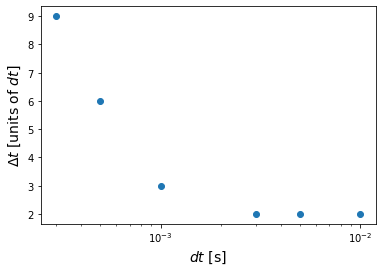

In [17]:
plt.plot(dt,Dt,'o')
plt.xscale('log')
s = 14
plt.xlabel('$dt$ [s]', fontsize=s)
plt.ylabel('$\Delta t$ [units of $dt$]', fontsize=s)
plt.savefig('deltat_vs_dt', format='pdf')